1. Filter the data to include only weekdays (Monday to Friday) and
plot a line graph showing the pedestrian counts for each day of the
week.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

In [2]:
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [7]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

In [5]:
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [14]:
montofri=df[(df['hour_beginning'].dt.dayofweek.between(0,4))]


In [15]:
pedestrian_count_pday=montofri.groupby(montofri['hour_beginning'].dt.day_name())['Pedestrians'].sum()

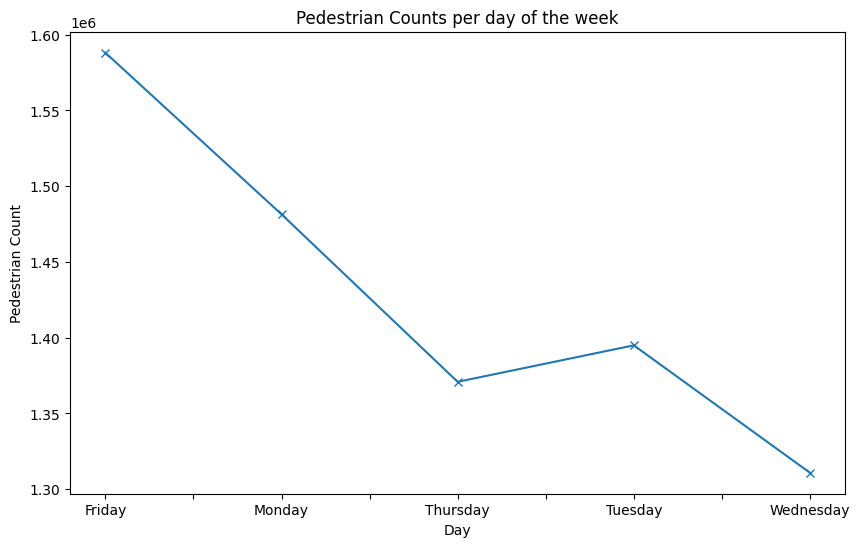

In [20]:
plt.figure(figsize=(10, 6))
pedestrian_count_pday.plot(kind='line', marker='x')
plt.title('Pedestrian Counts per day of the week')
plt.xlabel('Day')
plt.ylabel('Pedestrian Count')
plt.show()

Track pedestrian counts on the Brooklyn Bridge for the year 2019
and analyze how different weather conditions influence pedestrian
activity in that year. Sort the pedestrian count data by weather
summary to identify any correlations( with a correlation matrix)
between weather patterns and pedestrian counts for the selected year.

-This question requires you to show the relationship between a
numerical feature(Pedestrians) and a non-numerical feature(Weather
Summary). In such instances we use Encoding. Each weather condition
can be encoded as numbers( 0,1,2..). This technique is called One-hot
encoding.

-Correlation matrices may not always be the most suitable
visualization method for relationships involving categorical
datapoints, nonetheless this was given as a question to help you
understand the concept better.

In [21]:
import seaborn as sns

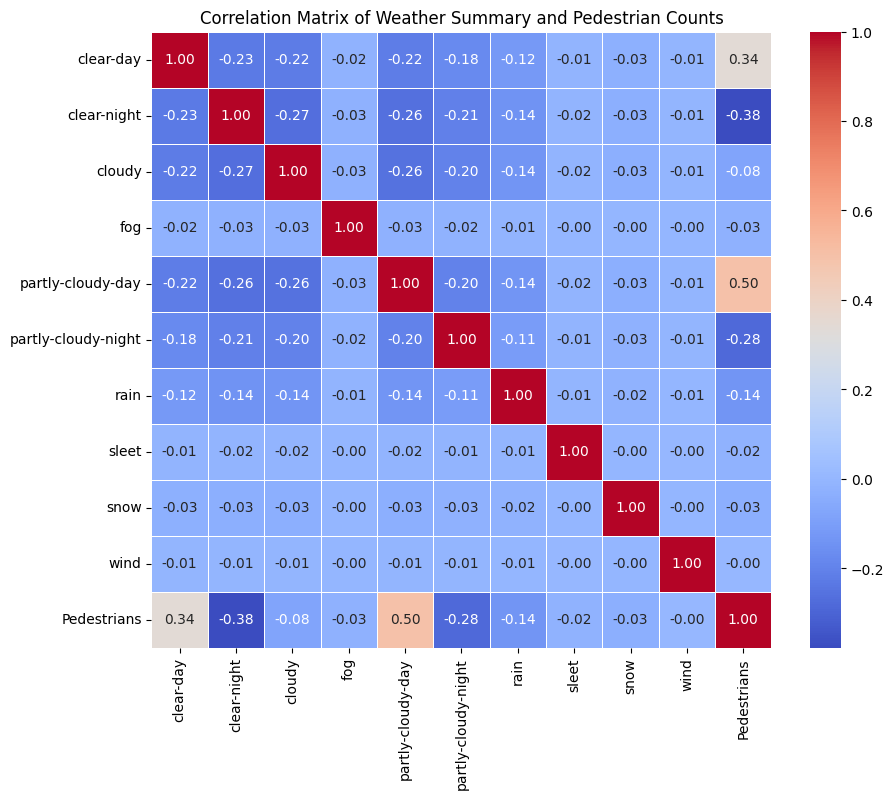

In [22]:
bridge_data = df[(df['location'] == 'Brooklyn Bridge') & (df['hour_beginning'].dt.year == 2019)]

weather_dummy = pd.get_dummies(bridge_data['weather_summary'])

combined_data = pd.concat([weather_dummy,bridge_data['Pedestrians']], axis=1)

correlations = combined_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Weather Summary and Pedestrian Counts')
plt.show()

3- Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

-Students can also show plots analyzing activity.

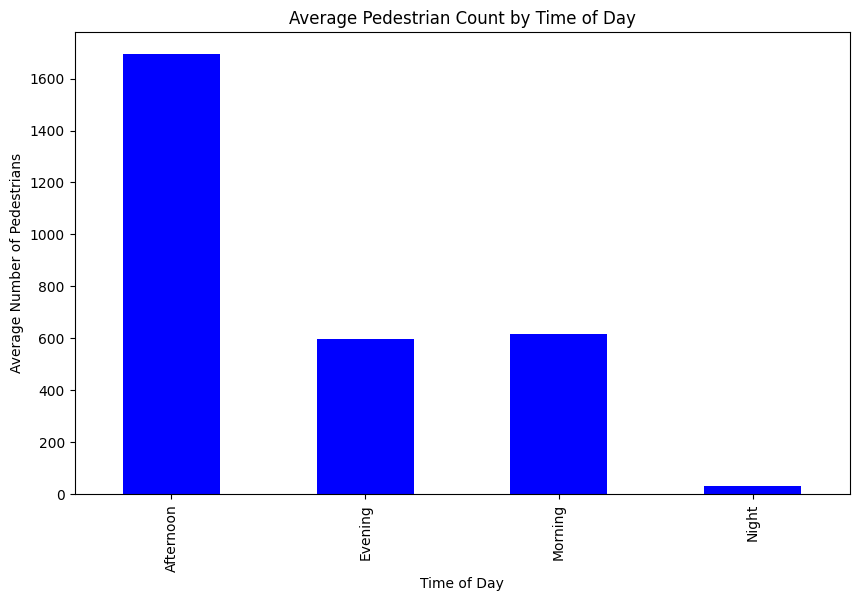


Average Pedestrians by Time of Day:
time_of_day
Afternoon    1694.84
Evening       596.59
Morning       614.54
Night          31.11
Name: Pedestrians, dtype: float64


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Create time categories
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

# Create time of day column
df['time_of_day'] = df['hour_beginning'].dt.hour.apply(categorize_time_of_day)

# Calculate average pedestrians by time of day
avg_pedestrians = df.groupby('time_of_day')['Pedestrians'].mean()

# Create a simple bar plot
plt.figure(figsize=(10, 6))
avg_pedestrians.plot(kind='bar', color='blue')
plt.title('Average Pedestrian Count by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Number of Pedestrians')
plt.show()

# Print the averages
print("\nAverage Pedestrians by Time of Day:")
print(avg_pedestrians.round(2))